In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from tqdm import tqdm
from mtcnn.mtcnn import MTCNN
import random as rn
import os
import cv2

Using TensorFlow backend.
C:\Users\Devkul Sahu\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Devkul Sahu\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Devkul Sahu\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users

In [8]:
class_names = ['Ben Affleck','Devkul','Madonna','Prasiddha','Sourabh']
#class_names = ['Ben Affleck','Devkul','Madonna','Prasiddha','Sourabh']

In [43]:
X=[]
Z=[]
ben_dir = 'data/ben_afflek'
devkul_dir = 'data/devkul'
madonna_dir = 'data/madonna'
prasiddha_dir = 'data/prasiddha'
sourabh_dir = 'data/sourabh'

In [44]:
def assign_label(img, names):
    return names

In [45]:
def make_train_data(names, DIR):
    for img in tqdm(os.listdir(DIR)):
        label = assign_label(img, names)
        path = os.path.join(DIR, img)
        img = cv2.imread(path, cv2.IMREAD_COLOR)
        img_c = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_c = cv2.resize(img_c,(150,150))
        X.append(np.array(img_c))
        Z.append(str(label))

In [46]:
make_train_data(class_names[0],ben_dir)

100%|█████████████████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 196.02it/s]


In [47]:
make_train_data(class_names[1],devkul_dir)


100%|███████████████████████████████████████████████████████████████████████████████| 367/367 [00:02<00:00, 178.67it/s]


In [48]:
make_train_data(class_names[2],madonna_dir)

100%|██████████████████████████████████████████████████████████████████████████████████| 23/23 [00:00<00:00, 71.09it/s]


In [49]:
make_train_data(class_names[3],prasiddha_dir)


100%|███████████████████████████████████████████████████████████████████████████████| 342/342 [00:01<00:00, 209.87it/s]


In [50]:
make_train_data(class_names[4],sourabh_dir)

100%|███████████████████████████████████████████████████████████████████████████████| 311/311 [00:01<00:00, 244.91it/s]


In [51]:
print(len(X))
print(len(Z))

1065
1065


## Visualizing some Random Images

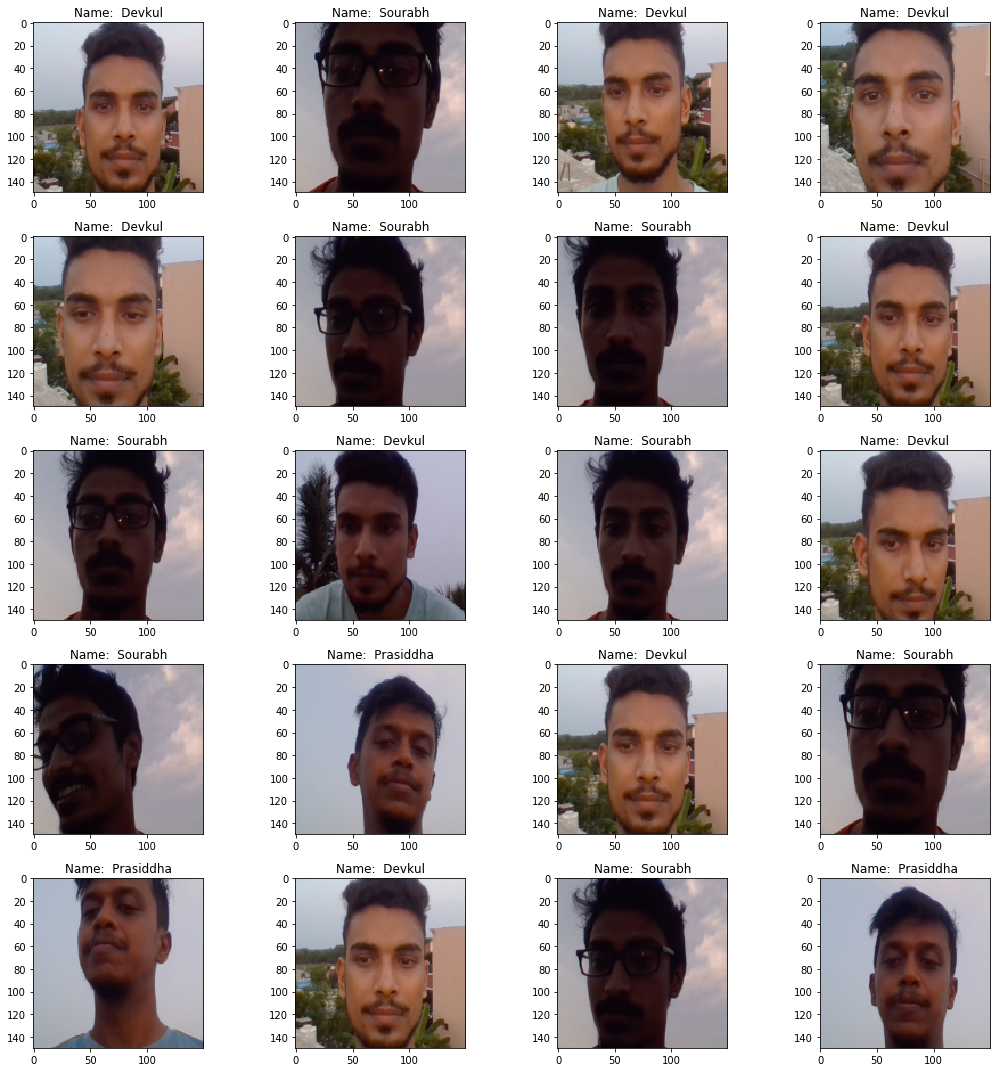

In [52]:
fig, ax = plt.subplots(5,4)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range(4):
        l = rn.randint(0, len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title("Name:  " +Z[l])
plt.tight_layout()

# Extract all the images and crop into 160,160,3






Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor

Instructions for updating:
Deprecated in favor of operator or tf.math.divide.



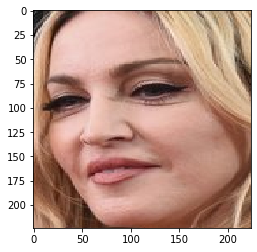

(224, 224, 3)


In [55]:
from PIL import Image
def extract_face(filename, required_size=(224, 224)):
    # load image from file
    image = Image.open(filename)
    # convert to RGB, if needed
    image = image.convert('RGB')
    # convert to array
    pixels = np.asarray(image)
    # create the detector, using default weights
    detector = MTCNN()
    # detect faces in the image
    results = detector.detect_faces(pixels)
    # extract the bounding box from the first face
    x1, y1, width, height = results[0]['box']
    # deal with negative pixel index
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    # extract the face
    face = pixels[y1:y2, x1:x2]
    # resize pixels to the model size
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = np.asarray(image)
    return face_array

# load the photo and extract the face
pixels = extract_face('m1.jpg')
plt.imshow(pixels)
plt.show()
print(pixels.shape)

In [58]:
from tqdm import tqdm
Xl, Zl = list(), list()
def load_face(dir):
    faces = list()
    # enumerate files
    for filename in tqdm(os.listdir(dir)):
        path = dir + filename
        face = extract_face(path)
        faces.append(face)
    return faces

def load_dataset(dir):
    # list for faces and labels
    for subdir in tqdm(os.listdir(dir)):
        path = dir + subdir + '/'
        faces = load_face(path)
        labels = [subdir for i in range(len(faces))]
        print("loaded %d sample for class: %s" % (len(faces),subdir) ) # print progress
        Xl.extend(faces)
        Zl.extend(labels)
    #return np.asarray(Xl), np.asarray(Zl)


# load train dataset
load_dataset('data/')
# load test dataset
# load_dataset('data1/val/')

# save and compress the dataset for further use
#np.savez_compressed('5-celebrity-faces-dataset.npz', trainX, trainy, testX, testy)



  0%|                                                                                            | 0/5 [00:00<?, ?it/s]


  0%|                                                                                           | 0/22 [00:00<?, ?it/s]


  5%|███▊                                                                               | 1/22 [00:03<01:11,  3.40s/it]


  9%|███████▌                                                                           | 2/22 [00:06<01:07,  3.36s/it]


 14%|███████████▎                                                                       | 3/22 [00:09<01:03,  3.35s/it]


 18%|███████████████                                                                    | 4/22 [00:13<01:00,  3.37s/it]


 23%|██████████████████▊                                                                | 5/22 [00:17<00:58,  3.46s/it]


 27%|██████████████████████▋                                                            | 6/22 [00:20<00:53,  3.36s/it]


 32%|█████████████████

loaded 22 sample for class: ben_afflek




 20%|████████████████▊                                                                   | 1/5 [01:13<04:53, 73.48s/it]


  0%|                                                                                          | 0/367 [00:00<?, ?it/s]


  0%|▏                                                                                 | 1/367 [00:03<19:12,  3.15s/it]


  1%|▍                                                                                 | 2/367 [00:06<18:53,  3.10s/it]


  1%|▋                                                                                 | 3/367 [00:09<19:33,  3.22s/it]


  1%|▉                                                                                 | 4/367 [00:12<19:04,  3.15s/it]


  1%|█                                                                                 | 5/367 [00:15<19:15,  3.19s/it]


  2%|█▎                                                                                | 6/367 [00:18<18:52,  3.14s/it]


  2%|█▌               

 36%|████████████████████████████▉                                                   | 133/367 [06:58<11:50,  3.04s/it]


 37%|█████████████████████████████▏                                                  | 134/367 [07:01<11:53,  3.06s/it]


 37%|█████████████████████████████▍                                                  | 135/367 [07:04<11:43,  3.03s/it]


 37%|█████████████████████████████▋                                                  | 136/367 [07:07<11:42,  3.04s/it]


 37%|█████████████████████████████▊                                                  | 137/367 [07:10<11:41,  3.05s/it]


 38%|██████████████████████████████                                                  | 138/367 [07:13<11:31,  3.02s/it]


 38%|██████████████████████████████▎                                                 | 139/367 [07:16<11:37,  3.06s/it]


 38%|██████████████████████████████▌                                                 | 140/367 [07:19<11:30,  3.04s/it]


 38%|███████████████████

 73%|██████████████████████████████████████████████████████████▏                     | 267/367 [13:37<04:54,  2.94s/it]


 73%|██████████████████████████████████████████████████████████▍                     | 268/367 [13:40<04:48,  2.91s/it]


 73%|██████████████████████████████████████████████████████████▋                     | 269/367 [13:43<04:47,  2.94s/it]


 74%|██████████████████████████████████████████████████████████▊                     | 270/367 [13:46<04:45,  2.94s/it]


 74%|███████████████████████████████████████████████████████████                     | 271/367 [13:49<04:39,  2.91s/it]


 74%|███████████████████████████████████████████████████████████▎                    | 272/367 [13:52<04:38,  2.93s/it]


 74%|███████████████████████████████████████████████████████████▌                    | 273/367 [13:55<04:33,  2.91s/it]


 75%|███████████████████████████████████████████████████████████▋                    | 274/367 [13:58<04:30,  2.91s/it]


 75%|███████████████████

loaded 367 sample for class: devkul




 40%|█████████████████████████████████▏                                                 | 2/5 [20:00<19:28, 389.53s/it]


  0%|                                                                                           | 0/23 [00:00<?, ?it/s]


  4%|███▌                                                                               | 1/23 [00:03<01:22,  3.73s/it]


  9%|███████▏                                                                           | 2/23 [00:07<01:16,  3.65s/it]


 13%|██████████▊                                                                        | 3/23 [00:10<01:11,  3.58s/it]


 17%|██████████████▍                                                                    | 4/23 [00:13<01:05,  3.44s/it]


 22%|██████████████████                                                                 | 5/23 [00:17<01:01,  3.44s/it]


 26%|█████████████████████▋                                                             | 6/23 [00:20<00:57,  3.39s/it]


 30%|█████████████████

loaded 23 sample for class: madonna




 60%|█████████████████████████████████████████████████▊                                 | 3/5 [21:18<09:52, 296.22s/it]


  0%|                                                                                          | 0/342 [00:00<?, ?it/s]


  0%|▏                                                                                 | 1/342 [00:03<20:18,  3.57s/it]


  1%|▍                                                                                 | 2/342 [00:07<21:17,  3.76s/it]


  1%|▋                                                                                 | 3/342 [00:11<20:36,  3.65s/it]


  1%|▉                                                                                 | 4/342 [00:14<20:16,  3.60s/it]


  1%|█▏                                                                                | 5/342 [00:18<20:24,  3.63s/it]


  2%|█▍                                                                                | 6/342 [00:22<20:29,  3.66s/it]


  2%|█▋               

 39%|███████████████████████████████                                                 | 133/342 [07:45<11:42,  3.36s/it]


 39%|███████████████████████████████▎                                                | 134/342 [07:48<11:21,  3.28s/it]


 39%|███████████████████████████████▌                                                | 135/342 [07:51<11:06,  3.22s/it]


 40%|███████████████████████████████▊                                                | 136/342 [07:54<11:24,  3.32s/it]


 40%|████████████████████████████████                                                | 137/342 [07:58<12:00,  3.51s/it]


 40%|████████████████████████████████▎                                               | 138/342 [08:01<11:34,  3.41s/it]


 41%|████████████████████████████████▌                                               | 139/342 [08:05<11:36,  3.43s/it]


 41%|████████████████████████████████▋                                               | 140/342 [08:09<11:56,  3.55s/it]


 41%|███████████████████

 78%|██████████████████████████████████████████████████████████████▍                 | 267/342 [15:27<04:02,  3.23s/it]


 78%|██████████████████████████████████████████████████████████████▋                 | 268/342 [15:31<04:20,  3.52s/it]


 79%|██████████████████████████████████████████████████████████████▉                 | 269/342 [15:34<04:08,  3.41s/it]


 79%|███████████████████████████████████████████████████████████████▏                | 270/342 [15:38<04:03,  3.38s/it]


 79%|███████████████████████████████████████████████████████████████▍                | 271/342 [15:41<03:53,  3.29s/it]


 80%|███████████████████████████████████████████████████████████████▋                | 272/342 [15:45<03:58,  3.41s/it]


 80%|███████████████████████████████████████████████████████████████▊                | 273/342 [15:48<03:59,  3.48s/it]


 80%|████████████████████████████████████████████████████████████████                | 274/342 [15:52<04:09,  3.67s/it]


 80%|███████████████████

loaded 342 sample for class: prasiddha




 80%|██████████████████████████████████████████████████████████████████▍                | 4/5 [41:05<09:23, 563.41s/it]


  0%|                                                                                          | 0/311 [00:00<?, ?it/s]


  0%|▎                                                                                 | 1/311 [00:03<17:33,  3.40s/it]


  1%|▌                                                                                 | 2/311 [00:06<17:39,  3.43s/it]


  1%|▊                                                                                 | 3/311 [00:10<18:10,  3.54s/it]


  1%|█                                                                                 | 4/311 [00:14<17:45,  3.47s/it]


  2%|█▎                                                                                | 5/311 [00:17<18:06,  3.55s/it]


  2%|█▌                                                                                | 6/311 [00:20<17:29,  3.44s/it]


  2%|█▊               

 43%|██████████████████████████████████▏                                             | 133/311 [05:43<06:43,  2.27s/it]


 43%|██████████████████████████████████▍                                             | 134/311 [05:45<06:44,  2.28s/it]


 43%|██████████████████████████████████▋                                             | 135/311 [05:47<06:41,  2.28s/it]


 44%|██████████████████████████████████▉                                             | 136/311 [05:50<06:39,  2.28s/it]


 44%|███████████████████████████████████▏                                            | 137/311 [05:52<06:38,  2.29s/it]


 44%|███████████████████████████████████▍                                            | 138/311 [05:54<06:30,  2.26s/it]


 45%|███████████████████████████████████▊                                            | 139/311 [05:56<06:31,  2.27s/it]


 45%|████████████████████████████████████                                            | 140/311 [05:59<06:25,  2.25s/it]


 45%|███████████████████

 86%|████████████████████████████████████████████████████████████████████▋           | 267/311 [11:13<01:55,  2.62s/it]


 86%|████████████████████████████████████████████████████████████████████▉           | 268/311 [11:17<02:01,  2.82s/it]


 86%|█████████████████████████████████████████████████████████████████████▏          | 269/311 [11:20<02:03,  2.94s/it]


 87%|█████████████████████████████████████████████████████████████████████▍          | 270/311 [11:22<01:56,  2.84s/it]


 87%|█████████████████████████████████████████████████████████████████████▋          | 271/311 [11:25<01:52,  2.81s/it]


 87%|█████████████████████████████████████████████████████████████████████▉          | 272/311 [11:28<01:48,  2.79s/it]


 88%|██████████████████████████████████████████████████████████████████████▏         | 273/311 [11:30<01:43,  2.74s/it]


 88%|██████████████████████████████████████████████████████████████████████▍         | 274/311 [11:33<01:40,  2.71s/it]


 88%|███████████████████

loaded 311 sample for class: sourabh




100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [54:14<00:00, 651.00s/it]


In [59]:
print(len(Xl))
print(len(Zl))

1065
1065


## Visualizing some Cropped Random Images

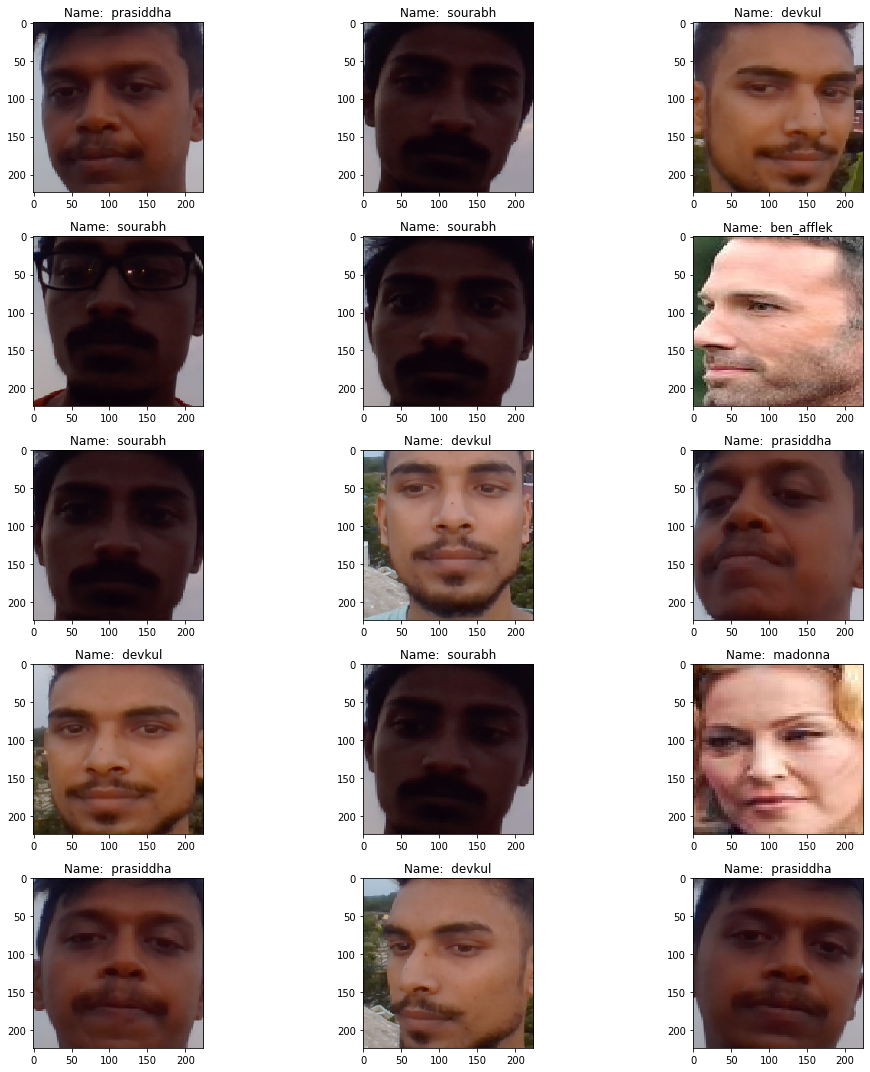

In [60]:
fig, ax = plt.subplots(5,3)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range(3):
        l = rn.randint(0, len(Xl))
        ax[i,j].imshow(Xl[l])
        ax[i,j].set_title("Name:  " +Zl[l])
plt.tight_layout()

## Import Libraries for model selection and preprocess

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
#preprocess.
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf

## Label Encoding the Y array and then One Hot Encoding

In [74]:
le=LabelEncoder()
Y=le.fit_transform(Zl)
Y=to_categorical(Y,5)
X=np.array(Xl)
X=X/255

### Splitting into Training and Validation Sets

In [75]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.15,random_state=42)

In [76]:
x_train.shape

(905, 224, 224, 3)

## Importing the Vgg16 model

In [63]:
img_size = [224,224]
vgg = VGG16(input_shape=img_size + [3], weights='imagenet', include_top=False)

In [64]:
#don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [70]:
folders = glob('data/*')
#print(folders)
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [71]:
model = Model(inputs=vgg.input, outputs=prediction)

In [72]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [77]:
model.compile(loss='categorical_crossentropy',
             optimizer= Adam(lr=0.001),
             metrics=['accuracy'])

## Data Augmentation to prevent Overfitting

In [78]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        #zca_whitening=True,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [79]:
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=32),
                              epochs = 10, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // 32)

Epoch 1/10
28/28 [==============================] - ETA: 3:00 - loss: 1.8501 - accuracy: 0.33 - ETA: 4:52 - loss: 2.1368 - accuracy: 0.43 - ETA: 4:46 - loss: 2.0706 - accuracy: 0.42 - ETA: 4:42 - loss: 2.2982 - accuracy: 0.39 - ETA: 4:29 - loss: 2.1497 - accuracy: 0.39 - ETA: 4:18 - loss: 2.1879 - accuracy: 0.37 - ETA: 4:05 - loss: 2.1735 - accuracy: 0.36 - ETA: 3:53 - loss: 2.0580 - accuracy: 0.39 - ETA: 3:42 - loss: 1.9717 - accuracy: 0.44 - ETA: 3:30 - loss: 1.8316 - accuracy: 0.47 - ETA: 3:18 - loss: 1.8408 - accuracy: 0.47 - ETA: 3:06 - loss: 1.7548 - accuracy: 0.50 - ETA: 2:54 - loss: 1.6473 - accuracy: 0.52 - ETA: 2:43 - loss: 1.6246 - accuracy: 0.55 - ETA: 2:31 - loss: 1.5618 - accuracy: 0.57 - ETA: 2:19 - loss: 1.4995 - accuracy: 0.58 - ETA: 2:07 - loss: 1.4417 - accuracy: 0.59 - ETA: 1:57 - loss: 1.3864 - accuracy: 0.61 - ETA: 1:46 - loss: 1.3506 - accuracy: 0.62 - ETA: 1:35 - loss: 1.3040 - accuracy: 0.64 - ETA: 1:23 - loss: 1.2664 - accuracy: 0.65 - ETA: 1:11 - loss: 1.2226

In [80]:
from keras.models import load_model
model.save('ben.h5')
del model #deletes the existing model
# returns a compiled model
# identical to the previous one
model = load_model('ben.h5')

In [81]:
pred=model.predict(x_test)
pred_digits=np.argmax(pred,axis=1)

In [82]:
# now storing some properly as well as misclassified indexes'.
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        prop_class.append(i)
#     if(len(prop_class)==8):
#         break

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        mis_class.append(i)
#     if(len(mis_class)==8):
#         break

In [83]:
print(len(x_test))
print(len(prop_class))
print(len(mis_class))

160
159
1


'Ben Affleck'

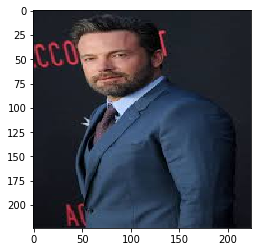

In [12]:
from keras import preprocessing
type_1 = preprocessing.image.load_img('b1.jpg', target_size=(224,224))
plt.imshow(type_1)
type_1_X = np.expand_dims(type_1, axis=0)
predictions = model.predict(type_1_X)
class_names[np.argmax(predictions)]
#print(predictions)